📊 Desafio 64 — Análise de Acidentes de Trânsito
📂 Dataset: dia_64_acidentes_transito.csv
Este conjunto de dados contém registros de acidentes de trânsito ocorridos em uma cidade, com informações como data, local, tipo de acidente, número de vítimas e condições climáticas.

🔍 Tarefas:

Quantos acidentes ocorreram em dias de chuva?
Filtre os registros onde a condição climática era "Chuva" e conte.

Qual o tipo de acidente mais comum?
Agrupe por tipo_acidente e conte a frequência de cada um.

Existe um dia da semana com mais ocorrências?
Verifique qual valor de dia_semana aparece com maior frequência.

Crie um gráfico de barras mostrando o número de acidentes por mês.
Dica: converta a coluna de data e extraia o mês.

(Machine Learning) Classifique se um acidente será com ou sem vítimas.

Variável-alvo: com_vitima (Sim/Não)

Sugestão de algoritmos: LogisticRegression ou RandomForestClassifier

Avalie com accuracy_score e classification_report

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [41]:
df = pd.read_csv("dia_64_acidentes_transito.csv")
df.head()

,data,dia_semana,local,tipo_acidente,numero_vitimas,condicao_climatica,com_vitima
0,2023-01-01,Segunda,Centro,Colisão,0,Sol,Não
1,2023-01-02,Terça,Zona Norte,Atropelamento,1,Chuva,Sim
2,2023-01-03,Quarta,Zona Sul,Capotamento,2,Nublado,Sim
3,2023-01-04,Quinta,Zona Leste,Queda,3,Chuva,Sim
4,2023-01-05,Sexta,Zona Oeste,Incêndio,0,Sol,Não


In [9]:
#Quantos acidentes ocorreram em dias de chuva? Filtre os registros onde a condição climática era "Chuva" e conte.
dias_chuva = df[df["condicao_climatica"] == "Chuva"].value_counts()
print(len(dias_chuva))

40


In [10]:
#Qual o tipo de acidente mais comum? Agrupe por tipo_acidente e conte a frequência de cada um.
acidente_comum = df["tipo_acidente"].value_counts()
print(acidente_comum)

tipo_acidente
Colisão          20
Atropelamento    20
Capotamento      20
Queda            20
Incêndio         20
Name: count, dtype: int64


In [12]:
#Existe um dia da semana com mais ocorrências? Verifique qual valor de dia_semana aparece com maior frequência.
dia_mais_ocorrencia = df["dia_semana"].value_counts()
print(dia_mais_ocorrencia)

dia_semana
Segunda    15
Terça      15
Quarta     14
Quinta     14
Sexta      14
Sábado     14
Domingo    14
Name: count, dtype: int64


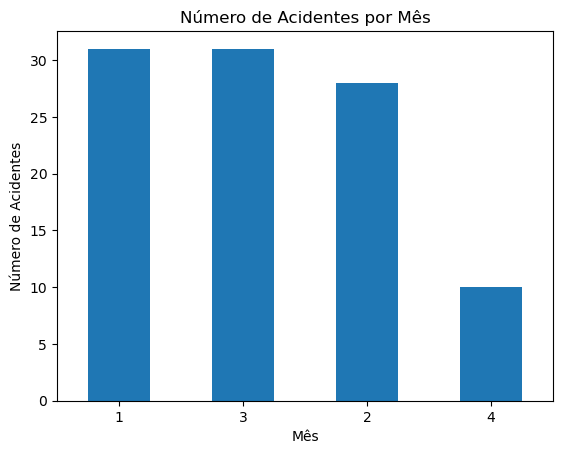

In [31]:
#Crie um gráfico de barras mostrando o número de acidentes por mês. Dica: converta a coluna de data e extraia o mês.
df["data"] = pd.to_datetime(df["data"])
df["mes"] = df["data"].dt.month

df["mes"].value_counts().plot(kind="bar")
plt.title("Número de Acidentes por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=0)
plt.show()

In [46]:
#(Machine Learning) Classifique se um acidente será com ou sem vítimas. Variável-alvo: com_vitima (Sim/Não)
colunas = ["dia_semana", "tipo_acidente", "condicao_climatica", "com_vitima"]
df_model = df[colunas].dropna()

for col in colunas:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

X = df_model.drop("com_vitima", axis=1)
y = df_model["com_vitima"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.68      0.75      0.71        20

    accuracy                           0.60        30
   macro avg       0.53      0.53      0.52        30
weighted avg       0.58      0.60      0.59        30

